In [2]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
df = pd.read_csv("/content/drive/MyDrive/student_data.csv")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/student_data.csv")

# One-hot encoding for categorical features
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
one_hot_encoder = OneHotEncoder()
one_hot_encoded = one_hot_encoder.fit_transform(data[categorical_columns]).toarray()

# Normalize numerical features
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
min_max_scaler = MinMaxScaler()
numerical_normalized = min_max_scaler.fit_transform(data[numerical_columns])

# Combine preprocessed categorical and numerical features
preprocessed_data = np.concatenate([one_hot_encoded, numerical_normalized], axis=1)

# Extract G1, G2, and G3 as target variables
targets = data[['G1', 'G2', 'G3']].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, targets, test_size=0.2, random_state=42)


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(3)  # 3 output nodes for G1, G2, and G3
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

# Create the model
input_shape = (X_train.shape[1],)
model = create_model(input_shape)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)

print(f"Mean Absolute Error: {mae}")


Epoch 1/150
10/10 [==============================] - 2s 33ms/step - loss: 129.3347 - mae: 10.6844 - val_loss: 130.1733 - val_mae: 10.6711
Epoch 2/150
10/10 [==============================] - 0s 9ms/step - loss: 121.2466 - mae: 10.3088 - val_loss: 122.1625 - val_mae: 10.2886
Epoch 3/150
10/10 [==============================] - 0s 10ms/step - loss: 110.5999 - mae: 9.7867 - val_loss: 108.4679 - val_mae: 9.5862
Epoch 4/150
10/10 [==============================] - 0s 8ms/step - loss: 93.4828 - mae: 8.8563 - val_loss: 85.0058 - val_mae: 8.2148
Epoch 5/150
10/10 [==============================] - 0s 8ms/step - loss: 65.0454 - mae: 6.9992 - val_loss: 52.7662 - val_mae: 6.0591
Epoch 6/150
10/10 [==============================] - 0s 9ms/step - loss: 39.1465 - mae: 5.1677 - val_loss: 30.8128 - val_mae: 4.5686
Epoch 7/150
10/10 [==============================] - 0s 10ms/step - loss: 27.2363 - mae: 4.1513 - val_loss: 20.5661 - val_mae: 3.6961
Epoch 8/150
10/10 [==============================] - 0s 

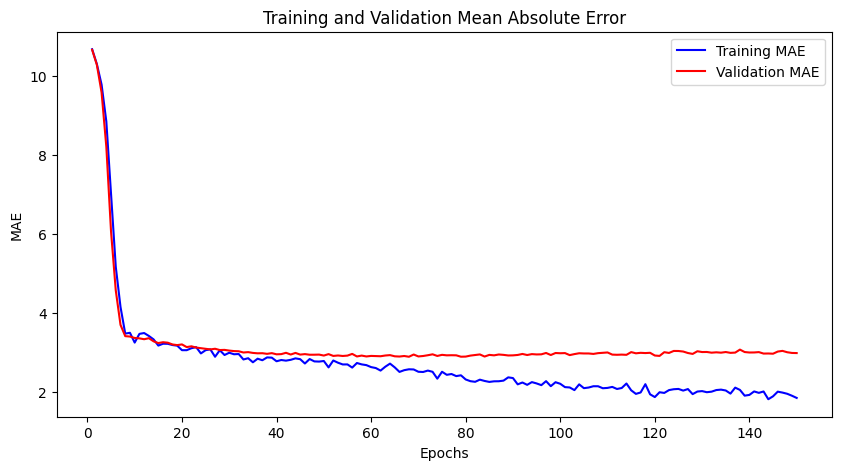

In [8]:
import matplotlib.pyplot as plt

def plot_evaluation(history):
    # Retrieve training and validation metrics
    train_mae = history.history['mae']
    val_mae = history.history['val_mae']
    epochs = range(1, len(train_mae) + 1)

    # Create the plot
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_mae, 'b', label='Training MAE')
    plt.plot(epochs, val_mae, 'r', label='Validation MAE')
    plt.title('Training and Validation Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

# Plot the evaluation parameters
plot_evaluation(history)


In [16]:
def predict_random_test_sample(model, X_test, y_test, one_hot_encoder, min_max_scaler, categorical_columns, numerical_columns):
    # Select a random sample from the test set
    idx = np.random.choice(X_test.shape[0])
    test_sample = X_test[idx].reshape(1, -1)
    true_values = y_test[idx]

    # Make a prediction
    prediction = model.predict(test_sample).flatten()

    # Reverse the preprocessing
    categorical_data = one_hot_encoder.inverse_transform(test_sample[:, :sum([len(cat) for cat in one_hot_encoder.categories_])])
    numerical_data = min_max_scaler.inverse_transform(test_sample[:, sum([len(cat) for cat in one_hot_encoder.categories_]):])

    # Combine the data and display
    input_data = pd.Series(np.concatenate([categorical_data[0], numerical_data[0]]), index=categorical_columns + numerical_columns)
    print("Input parameters:")
    print(input_data)

    print("\nTrue G1, G2, G3:", true_values)
    print("Predicted G1, G2, G3:", prediction)

# Make a prediction on a random test sample
predict_random_test_sample(model, X_test, y_test, one_hot_encoder, min_max_scaler, categorical_columns, numerical_columns)


1/1 [==============================] - 0s 24ms/step
Input parameters:
school              GP
sex                  M
address              U
famsize            GT3
Pstatus              T
Mjob          services
Fjob          services
reason          course
guardian        mother
schoolsup           no
famsup             yes
paid                no
activities         yes
nursery            yes
higher             yes
internet           yes
romantic            no
age               17.0
Medu               3.0
Fedu               2.0
traveltime         1.0
studytime          1.0
failures           3.0
famrel             5.0
freetime           5.0
goout              5.0
Dalc               2.0
Walc               4.0
health             5.0
absences          16.0
dtype: object

True G1, G2, G3: [6 5 5]
Predicted G1, G2, G3: [6.1650443 5.499699  4.8287015]


In [20]:
def predict_random_test_sample(model, X_test, y_test, one_hot_encoder, min_max_scaler, categorical_columns, numerical_columns):
    # Select a random sample from the test set
    idx = np.random.choice(X_test.shape[0])
    test_sample = X_test[idx].reshape(1, -1)
    true_values = y_test[idx]

    # Make a prediction
    prediction = model.predict(test_sample).flatten()

    # Round up the predicted values
    rounded_prediction = np.ceil(prediction)

    # Reverse the preprocessing
    categorical_data = one_hot_encoder.inverse_transform(test_sample[:, :sum([len(cat) for cat in one_hot_encoder.categories_])])
    numerical_data = min_max_scaler.inverse_transform(test_sample[:, sum([len(cat) for cat in one_hot_encoder.categories_]):])

    # Combine the data and display
    input_data = pd.Series(np.concatenate([categorical_data[0], numerical_data[0]]), index=categorical_columns + numerical_columns)
    print("Input parameters:")
    print(input_data)

    print("\nTrue G1, G2, G3:", true_values)
    print("Predicted G1, G2, G3 (rounded up):", rounded_prediction)

# Make a prediction on a random test sample
predict_random_test_sample(model, X_test, y_test, one_hot_encoder, min_max_scaler, categorical_columns, numerical_columns)


1/1 [==============================] - 0s 33ms/step
Input parameters:
school              MS
sex                  M
address              R
famsize            LE3
Pstatus              T
Mjob           at_home
Fjob          services
reason           other
guardian        father
schoolsup           no
famsup             yes
paid               yes
activities         yes
nursery            yes
higher              no
internet           yes
romantic           yes
age               18.0
Medu               1.0
Fedu               2.0
traveltime         3.0
studytime          1.0
failures           0.0
famrel             4.0
freetime           3.0
goout              3.0
Dalc               2.0
Walc               3.0
health             3.0
absences           3.0
dtype: object

True G1, G2, G3: [14 12 12]
Predicted G1, G2, G3 (rounded up): [10.  9.  8.]


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
def create_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(3)  # 3 output nodes for G1, G2, and G3
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

# Create the model
input_shape = (X_train.shape[1],)
model = create_model(input_shape)

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)

print(f"Mean Absolute Error: {mae}")


Epoch 1/200
10/10 [==============================] - 2s 32ms/step - loss: 112.8659 - mae: 9.9135 - val_loss: 100.9445 - val_mae: 9.2727
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 78.5401 - mae: 8.0659 - val_loss: 49.0342 - val_mae: 6.0071
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 37.5454 - mae: 5.0054 - val_loss: 17.8641 - val_mae: 3.4363
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 30.4819 - mae: 4.3935 - val_loss: 18.1868 - val_mae: 3.5165
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 24.4562 - mae: 4.0905 - val_loss: 21.2794 - val_mae: 3.7738
Epoch 6/200
10/10 [==============================] - 0s 9ms/step - loss: 25.5320 - mae: 4.0059 - val_loss: 15.9635 - val_mae: 3.2881
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 24.1713 - mae: 3.8864 - val_loss: 16.4536 - val_mae: 3.3200
Epoch 8/200
10/10 [==============================] - 0s 6ms/step -

In [33]:

# Make a prediction on a random test sample
predict_random_test_sample(model, X_test, y_test, one_hot_encoder, min_max_scaler, categorical_columns, numerical_columns)


1/1 [==============================] - 0s 34ms/step
Input parameters:
school            GP
sex                F
address            U
famsize          GT3
Pstatus            T
Mjob           other
Fjob           other
reason          home
guardian      mother
schoolsup         no
famsup            no
paid             yes
activities        no
nursery          yes
higher           yes
internet         yes
romantic         yes
age             16.0
Medu             2.0
Fedu             2.0
traveltime       1.0
studytime        2.0
failures         0.0
famrel           5.0
freetime         4.0
goout            4.0
Dalc             1.0
Walc             1.0
health           5.0
absences         0.0
dtype: object

True G1, G2, G3: [8 7 8]
Predicted G1, G2, G3 (rounded up): [11. 11. 10.]
